In [1]:
import pandas as pd
import numpy as np
import pylab as plt

import import_ipynb
from XY_Diskretisointi import *

df = pd.read_csv('./node_3200.csv', header=0)
df

importing Jupyter notebook from XY_Diskretisointi.ipynb


FileNotFoundError: [Errno 2] File ./node_3200.csv does not exist: './node_3200.csv'

# Otetaan näyte datasta ja plotataan se jotta nähtäisiin kaupan rajat suunilleen
- Tulostetaan samalla tarkat min/max arvot

10269.0
-50.0
5050.0
0.0


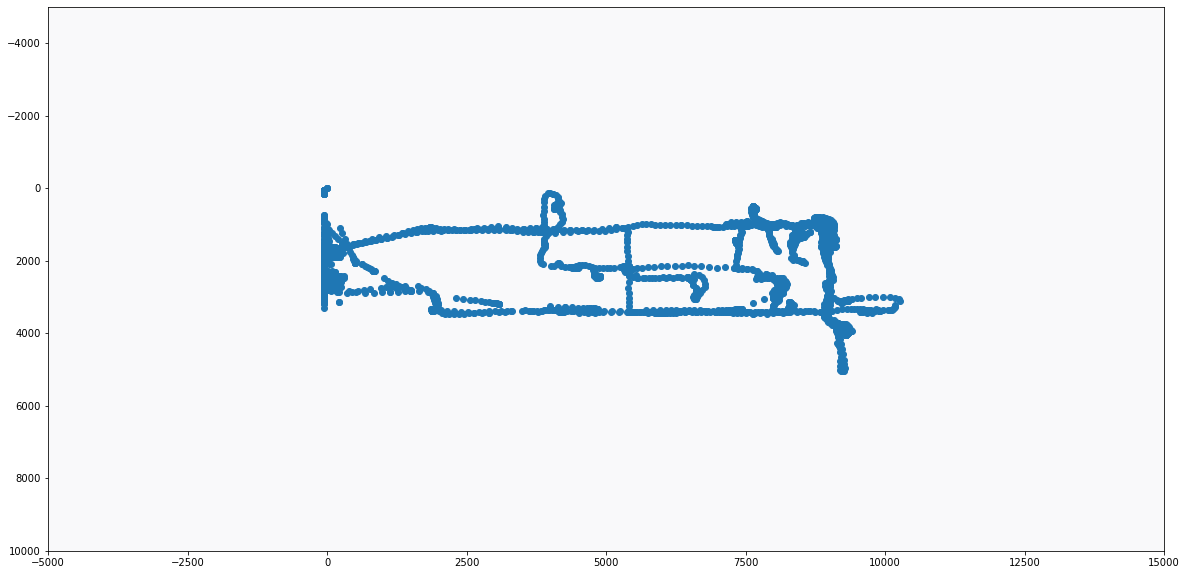

In [56]:
dfsample = df[:30000]

img = plt.imread("whitepic.png")
fig, ax = plt.subplots()
ax.imshow(img,extent=(-5000,15000,10000,-5000),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]
plt.plot(dfsample.x, dfsample.y, 'o')

print(dfsample.x.max())
print(dfsample.x.min())
print(dfsample.y.max())
print(dfsample.y.min())

In [58]:
dfsample = dfsample[dfsample['x'] < 6642]
dfsample = dfsample[dfsample['y'] < 4955]
dfsample = dfsample[dfsample['x'] > -5031]
dfsample = dfsample[dfsample['y'] > 280]

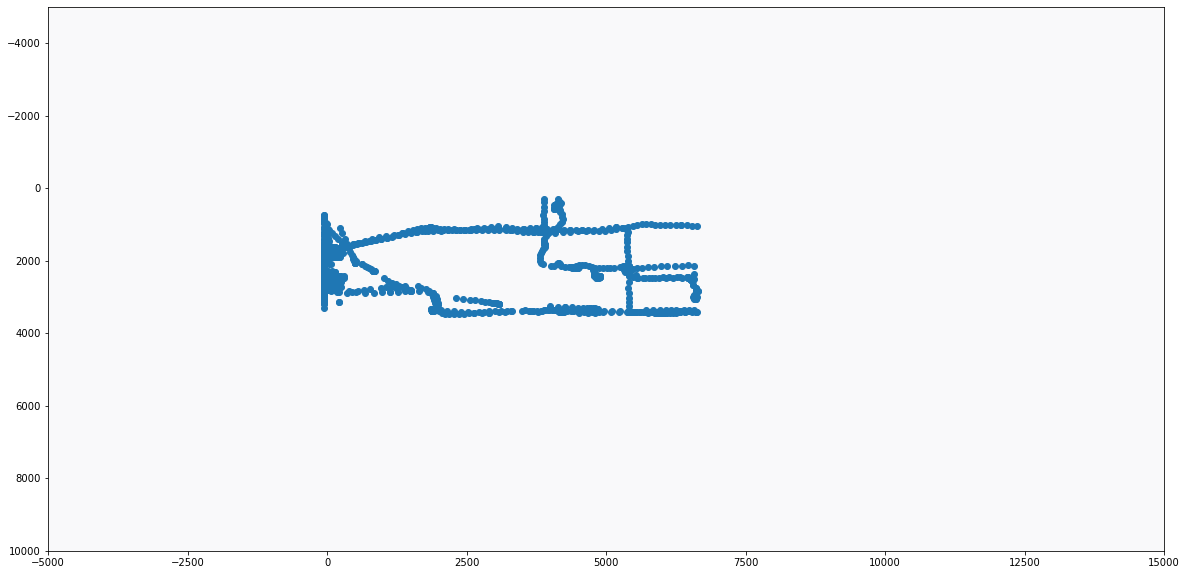

In [59]:
img = plt.imread("whitepic.png")
fig, ax = plt.subplots()
ax.imshow(img,extent=(-5000,15000,10000,-5000),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]
plt.plot(dfsample.x, dfsample.y, 'o')

# Suodatetaan sitten rajoja

In [6]:
df = df[df.y > -1]
df = df[df.y < 5051]
#df = df[df.q < ?]
df = df[df.x < 10270]
df = df[df.x > -1]
dfsample = df[:30000]
dfsample

,node_id,timestamp,x,y,z,q
0,3200,2019-03-07 11:46:19.078016+00:00,0.0,0.0,0.0,51.0
1,3200,2019-03-07 11:46:20.078012+00:00,0.0,0.0,0.0,163.0
2,3200,2019-03-07 11:46:21.078081+00:00,0.0,0.0,0.0,42.0
3,3200,2019-03-07 11:46:22.07813+00:00,0.0,0.0,0.0,105.0
37,3200,2019-03-13 15:30:15.687413+00:00,11.0,2273.0,0.0,76.0
...,...,...,...,...,...,...
30842,3200,2019-03-14 15:58:30.687955+00:00,135.0,2675.0,0.0,67.0
30843,3200,2019-03-14 15:58:31.687842+00:00,136.0,2676.0,0.0,88.0
30844,3200,2019-03-14 15:58:32.687999+00:00,128.0,2671.0,0.0,64.0
30845,3200,2019-03-14 15:58:33.687833+00:00,136.0,2672.0,0.0,86.0


# Koordinaatien normalisointi
- 

In [7]:
from sklearn import preprocessing

x = dfsample[['x','y']].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized = df_normalized.rename(columns={0: 'x', 1: 'y'})

df_normalized

,x,y
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.001071,0.450099
...,...,...
29995,0.013146,0.529703
29996,0.013244,0.529901
29997,0.012465,0.528911
29998,0.013244,0.529109


# XY koordinaatit gridiin KESKEN
- k = karkeisuus

In [37]:
df_normalized_grid = xy_to_grid(df_normalized,df_normalized.x,df_normalized.y, 10)
df_normalized_grid

,x,y
0.0,0.000000,0.000000
0.0,0.000000,0.000000
0.0,0.000000,0.000000
0.0,0.000000,0.000000
0.4,0.001071,0.450099
...,...,...
0.5,0.013146,0.529703
0.5,0.013244,0.529901
0.5,0.012465,0.528911
0.5,0.013244,0.529109


In [38]:
df_normalized_grid['xx'] = dfsample.x.values
df_normalized_grid['yy'] = dfsample.y.values

In [39]:
df_normalized_grid

,x,y,xx,yy
0.0,0.000000,0.000000,0.0,0.0
0.0,0.000000,0.000000,0.0,0.0
0.0,0.000000,0.000000,0.0,0.0
0.0,0.000000,0.000000,0.0,0.0
0.4,0.001071,0.450099,11.0,2273.0
...,...,...,...,...
0.5,0.013146,0.529703,135.0,2675.0
0.5,0.013244,0.529901,136.0,2676.0
0.5,0.012465,0.528911,128.0,2671.0
0.5,0.013244,0.529109,136.0,2672.0


# Saadaan kaikki 0.1 gridissä olevat pisteet

In [23]:
is_normalized = all(number > 1.01 for number in df_normalized.x.values)
print(is_normalized)

False


In [24]:
df_normalized.x.values

array([0.        , 0.        , 0.        , ..., 0.0124647 , 0.01324374,
       0.01402279])

In [25]:
#df_normalized_grid.loc[1.0]
#df_normalized_grid = df_normalized_grid.drop(columns=['q','z'])
df_normalized_grid

,x,y,xx,yy
0.0,0.000000,0.000000,0.0,0.0
0.0,0.000000,0.000000,0.0,0.0
0.0,0.000000,0.000000,0.0,0.0
0.0,0.000000,0.000000,0.0,0.0
0.4,0.001071,0.450099,11.0,2273.0
...,...,...,...,...
0.5,0.013146,0.529703,135.0,2675.0
0.5,0.013244,0.529901,136.0,2676.0
0.5,0.012465,0.528911,128.0,2671.0
0.5,0.013244,0.529109,136.0,2672.0


In [26]:

#df_normalized_grid.xx.max()
#df_normalized_grid.loc[5.1].min()

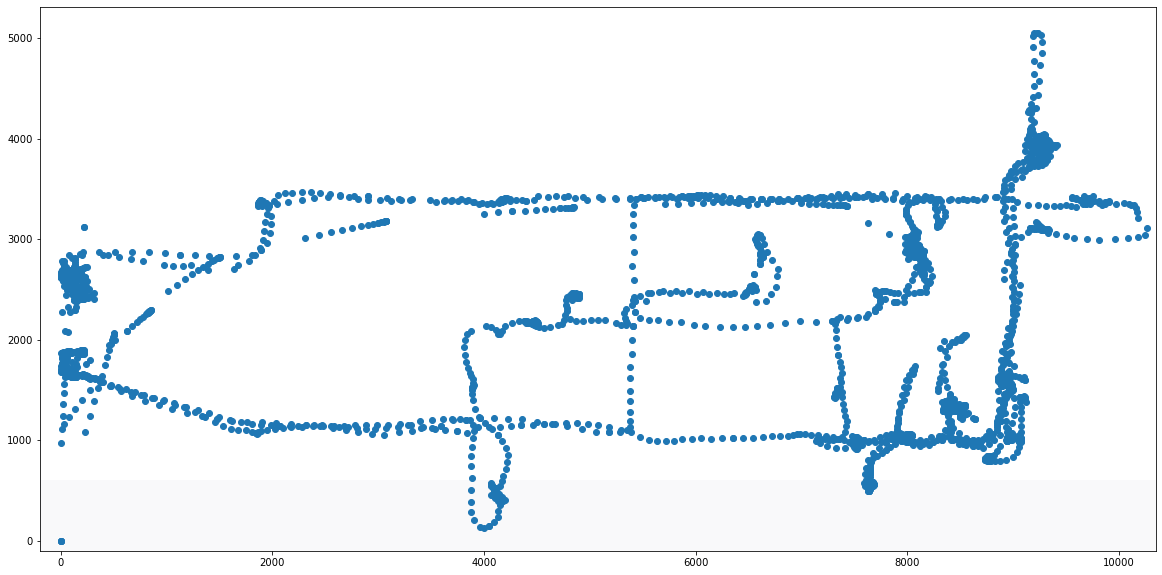

In [41]:
img = plt.imread("whitepic.png")
fig, ax = plt.subplots()
ax.imshow(img,extent=(-200,10350,600,-100),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]
#plt.grid(True)
#plt.xticks(np.arange(0,10300 , step=5150))
#plt.yticks(np.arange(0, 1, step=0.5))
plt.gca().invert_yaxis()
plt.plot(df_normalized_grid.xx, df_normalized_grid.yy, 'o')

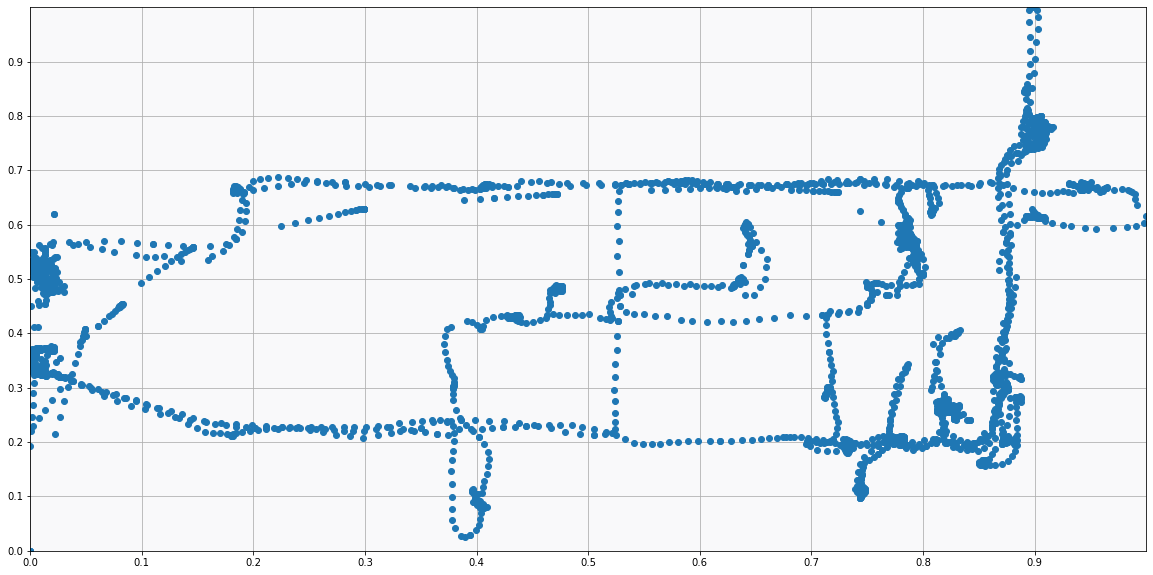

In [42]:
img = plt.imread("whitepic.png")
fig, ax = plt.subplots()
ax.imshow(img,extent=(0,1,0,1),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]
plt.grid(True)
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.plot(df_normalized_grid.x, df_normalized_grid.y, 'o')

In [43]:
df_normalized_grid.index.value_counts()

0.5    19061
0.4     7895
0.3      418
8.2      405
9.7      278
7.5      160
4.4      143
7.1      127
8.1      124
7.2      107
8.3      100
7.6       86
8.6       78
9.6       78
8.7       76
6.6       58
4.6       57
5.6       52
7.4       50
3.2       41
1.2       39
5.4       39
2.6       38
1.5       34
2.2       32
6.4       32
6.5       31
8.4       30
4.0       27
1.6       26
0.2       26
8.8       25
8.5       24
3.6       23
7.3       22
4.2       21
5.2       17
6.2       16
3.0       14
3.3       13
3.1       11
4.1       10
7.0        9
8.9        7
9.5        7
9.9        5
3.4        4
5.5        4
5.3        4
5.1        4
0.0        4
9.8        2
0.6        2
6.1        2
2.5        1
0.1        1
dtype: int64

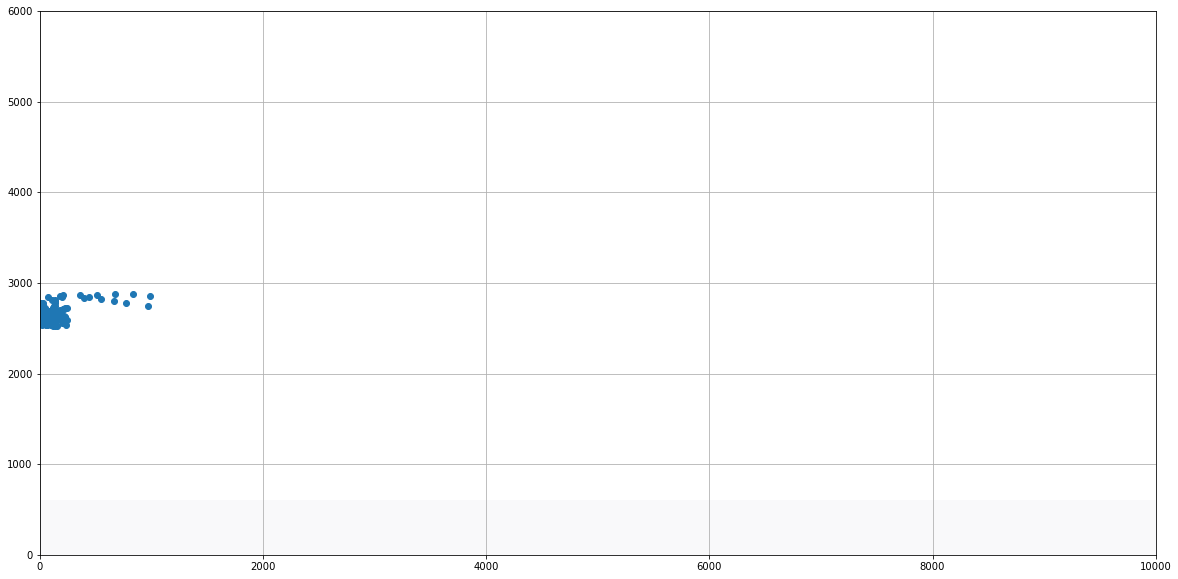

In [52]:
img = plt.imread("whitepic.png")
fig, ax = plt.subplots()
ax.imshow(img,extent=(-200,10350,600,-100),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]
plt.ylim(0,6000)
plt.xlim(0,10000)
plt.grid(True)
#plt.gca().invert_yaxis()
plt.plot(df_normalized_grid.loc[0.5].xx, df_normalized_grid.loc[0.5].yy, 'o')

In [73]:
x = df[['x','y']].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized = df_normalized.rename(columns={0: 'x', 1: 'y'})

df_normalized

,x,y
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.001071,0.450099
...,...,...
2950220,0.086571,0.138218
2950221,0.080436,0.150297
2950222,0.081605,0.147921
2950223,0.082871,0.145545


In [106]:



data = pd.DataFrame()
data['x'], data['y'] = df_normalized['x'][0:100000].values,df_normalized['y'][0:100000].values


from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=80000,random_state=rs, contamination=.005) 
clf.fit(data)
if_scores = clf.decision_function(data)
if_anomalies=clf.predict(data)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=data[if_anomalies==1]

Text(0.5, 1.0, 'Histogram of Avg Anomaly Scores: Lower => More Anomalous')

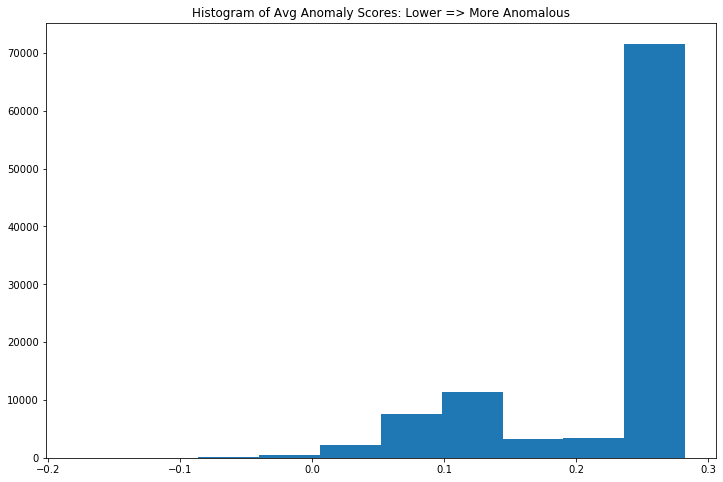

In [107]:
plt.figure(figsize=(12,8))
plt.hist(if_scores)
plt.title('Histogram of Avg Anomaly Scores: Lower => More Anomalous')

Text(0.5, 1.0, 'Isolation Forests - Anomalies')

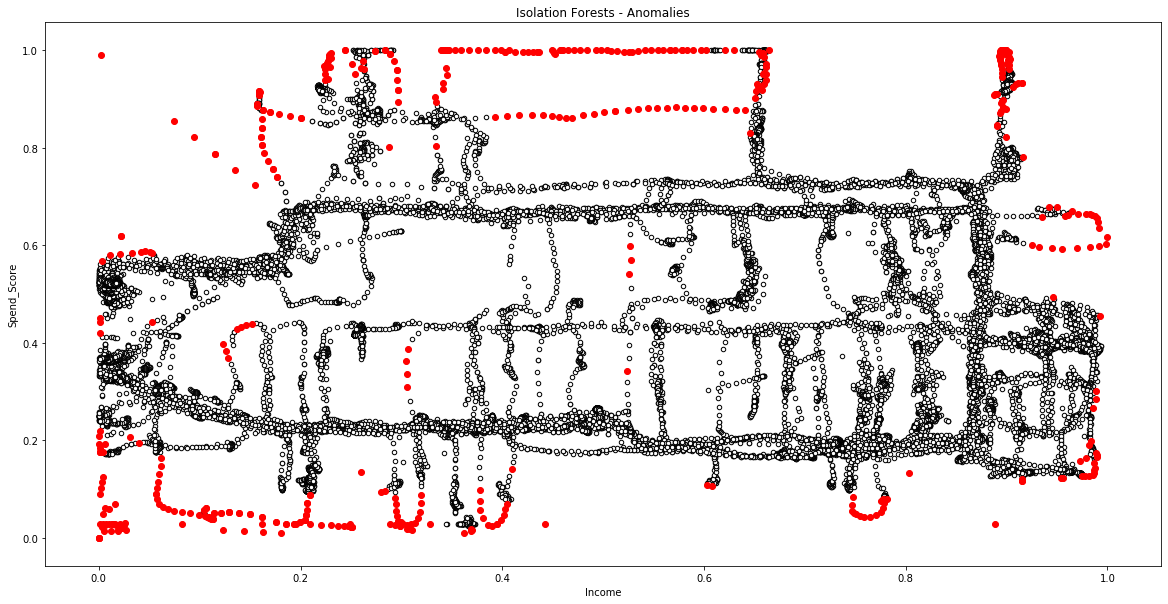

In [108]:
cmap=np.array(['white','red'])
plt.scatter(data.iloc[:,0],data.iloc[:,1],c='white',s=20,edgecolor='k')
plt.scatter(if_anomalies.iloc[:,0],if_anomalies.iloc[:,1],c='red')
plt.xlabel('Income')
plt.ylabel('Spend_Score')
plt.title('Isolation Forests - Anomalies')

In [99]:
data.iloc[:,1]

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.450099
           ...   
99995    0.522574
99996    0.522772
99997    0.522970
99998    0.523168
99999    0.522376
Name: y, Length: 100000, dtype: float64

In [23]:
df_normalized

,x,y
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.001071,0.450099
...,...,...
29995,0.013146,0.529703
29996,0.013244,0.529901
29997,0.012465,0.528911
29998,0.013244,0.529109
